* Download data manifest: https://portal.gdc.cancer.gov/repository
* Download the data in the manifest with Data Transfer Tool: https://docs.gdc.cancer.gov/Data_Transfer_Tool/Users_Guide/Getting_Started/

In [1]:
import ujson as json
import glob
import mygene
import shutil
mg = mygene.MyGeneInfo()

## clinical data from GDC dataportal - files.data_type: Clinical Supplement and files.data_format: BCR Biotab

In [2]:
list_of_dir = glob.glob('/Users/bsun/repos/DepMap/data/GDC-clinical/gdc_download_20210331_144453.602252/*')

## extract drug data from the downloaded 226 files (the file name with "drug" in it)

In [3]:
filenames = []
drugs = []
for dir_ in list_of_dir:
    if dir_.endswith('MANIFEST.txt'):
        continue
    content = os.listdir(dir_)
    if len(content) == 2:
        ann, nwchild = content
        if ann != 'annotations.txt':
            ann, nwchild = nwchild, ann
        assert ann == 'annotations.txt'
    else:
        nwchild = content[0]
    if not nwchild.startswith('nationwide'):
        print('bug')
    filenames.append(nwchild)
    if 'drug' in nwchild:
        nwc_df = pd.read_csv(os.path.join(dir_, nwchild), sep='\t')
        drugs.append(nwc_df.iloc[2:, :])

In [4]:
sorted(filenames)  # there are not only drug data files, but we are interested in drugs here

['nationwidechildrens.org_clinical_ablation_lihc.txt',
 'nationwidechildrens.org_clinical_drug_acc.txt',
 'nationwidechildrens.org_clinical_drug_blca.txt',
 'nationwidechildrens.org_clinical_drug_brca.txt',
 'nationwidechildrens.org_clinical_drug_cesc.txt',
 'nationwidechildrens.org_clinical_drug_chol.txt',
 'nationwidechildrens.org_clinical_drug_coad.txt',
 'nationwidechildrens.org_clinical_drug_dlbc.txt',
 'nationwidechildrens.org_clinical_drug_esca.txt',
 'nationwidechildrens.org_clinical_drug_gbm.txt',
 'nationwidechildrens.org_clinical_drug_hnsc.txt',
 'nationwidechildrens.org_clinical_drug_kich.txt',
 'nationwidechildrens.org_clinical_drug_kirc.txt',
 'nationwidechildrens.org_clinical_drug_kirp.txt',
 'nationwidechildrens.org_clinical_drug_lgg.txt',
 'nationwidechildrens.org_clinical_drug_lihc.txt',
 'nationwidechildrens.org_clinical_drug_luad.txt',
 'nationwidechildrens.org_clinical_drug_lusc.txt',
 'nationwidechildrens.org_clinical_drug_meso.txt',
 'nationwidechildrens.org_clin

In [5]:
columns = ['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_drug_barcode',
       'bcr_drug_uuid', 'form_completion_date',
       'pharmaceutical_therapy_drug_name', 'pharmaceutical_therapy_type', 'pharmaceutical_tx_started_days_to', 'pharmaceutical_tx_ended_days_to']

In [6]:
drugs = [drug[columns] for drug in drugs]  # some drug files lack of columns, subset to the shared columns

In [7]:
drugs = pd.concat(drugs)

In [8]:
drugs['pharmaceutical_therapy_type'].value_counts()

Chemotherapy                               10201
Hormone Therapy                             1047
Targeted Molecular therapy                   586
Immunotherapy                                325
Ancillary                                    151
Other, specify in notes                      127
[Not Available]                               83
Vaccine                                       39
[Discrepancy]                                  5
Chemotherapy|Other, specify in notes           3
Chemotherapy|Targeted Molecular therapy        2
Chemotherapy|Hormone Therapy                   2
Name: pharmaceutical_therapy_type, dtype: int64

In [9]:
drugs['bcr_patient_uuid'].unique().shape

(4328,)

In [10]:
drugs['bcr_patient_barcode'].unique().shape

(4328,)

In [11]:
drugs['bcr_patient_barcode']

2      TCGA-2Y-A9GV
3      TCGA-2Y-A9GZ
4      TCGA-2Y-A9H8
5      TCGA-2Y-A9H8
6      TCGA-2Y-A9H8
           ...     
300    TCGA-ZF-AA53
301    TCGA-ZF-AA58
302    TCGA-ZF-AA58
303    TCGA-ZF-AA5H
304    TCGA-ZF-AA5H
Name: bcr_patient_barcode, Length: 12571, dtype: object

In [12]:
drugs[drugs['bcr_patient_barcode'] == 'TCGA-3K-AAZ8']  # tandomly use two drugs

,bcr_patient_uuid,bcr_patient_barcode,bcr_drug_barcode,bcr_drug_uuid,form_completion_date,pharmaceutical_therapy_drug_name,pharmaceutical_therapy_type,pharmaceutical_tx_started_days_to,pharmaceutical_tx_ended_days_to
8,94E387AE-B641-4E9F-BB53-22C7B2A9CCCB,TCGA-3K-AAZ8,TCGA-3K-AAZ8-D64051,53F09997-1A79-41DE-A307-66747EA290B2,2014-8-25,Sarafenib,[Not Available],212,304
9,94E387AE-B641-4E9F-BB53-22C7B2A9CCCB,TCGA-3K-AAZ8,TCGA-3K-AAZ8-D69331,4B86947A-374F-4EC2-8181-4C1BFBE93662,2015-1-5,Regorafenib,[Not Available],304,[Not Available]


In [13]:
drugs[drugs['bcr_patient_barcode'].duplicated()]  # simultaneously use two drugs

,bcr_patient_uuid,bcr_patient_barcode,bcr_drug_barcode,bcr_drug_uuid,form_completion_date,pharmaceutical_therapy_drug_name,pharmaceutical_therapy_type,pharmaceutical_tx_started_days_to,pharmaceutical_tx_ended_days_to
5,3528DD91-1A6D-4D41-A3EE-829C857CC904,TCGA-2Y-A9H8,TCGA-2Y-A9H8-D67251,D29ED18B-0AEF-4D85-B579-589538D17FC5,2014-11-3,everolimus,Chemotherapy,498,608
6,3528DD91-1A6D-4D41-A3EE-829C857CC904,TCGA-2Y-A9H8,TCGA-2Y-A9H8-D68658,300E5076-567C-411A-8977-EE9BCC5CE0B2,2014-12-5,SOM 230,Hormone Therapy,498,608
9,94E387AE-B641-4E9F-BB53-22C7B2A9CCCB,TCGA-3K-AAZ8,TCGA-3K-AAZ8-D69331,4B86947A-374F-4EC2-8181-4C1BFBE93662,2015-1-5,Regorafenib,[Not Available],304,[Not Available]
11,00f209c3-041a-4c6e-8b0f-6383eb3c85fc,TCGA-BC-4073,TCGA-BC-4073-D30830,63E0D664-0D86-4265-8609-3CA1E342E63B,2012-4-17,Sorafenib,Chemotherapy,166,[Not Available]
13,dfa15fbe-bb14-40ce-afc6-70694112e3e2,TCGA-BC-A10Q,TCGA-BC-A10Q-D9850,1BBDDEC2-4EE9-40B6-B907-EE429CE7D03A,2011-4-1,Mitomycin C,"Other, specify in notes",217,217
...,...,...,...,...,...,...,...,...,...
295,661967E5-94B3-4F98-9402-6AB137893C16,TCGA-YF-AA3L,TCGA-YF-AA3L-D59725,4AF60913-699B-42B6-B918-1930F7671B04,2014-5-23,Gemcitabine,Chemotherapy,214,[Not Available]
298,1029514B-A32C-4C43-A440-A5BA2709F717,TCGA-ZF-AA51,TCGA-ZF-AA51-D72092,097FAF51-5B92-4A4C-940C-73BE0DA86F74,2015-4-10,Cisplatin,Chemotherapy,69,148
300,92C6856A-B26F-4512-BBB1-8A8AFF4636AB,TCGA-ZF-AA53,TCGA-ZF-AA53-D72089,348A86EE-A088-45D5-BF2B-ABE4D6526C42,2015-4-10,Cisplatin,Chemotherapy,68,166
302,0DA6502C-058D-47F5-9996-8AA1D511D7E4,TCGA-ZF-AA58,TCGA-ZF-AA58-D72103,907B197A-9F12-421F-986E-019634FFD53B,2015-4-13,Cisplatin,Chemotherapy,166,[Not Available]


In [14]:
# many drugs on E7E95597-EF88-4442-8C01-8D633822E7B5
drugs[drugs[['bcr_patient_barcode', 'pharmaceutical_therapy_drug_name']].duplicated()]

,bcr_patient_uuid,bcr_patient_barcode,bcr_drug_barcode,bcr_drug_uuid,form_completion_date,pharmaceutical_therapy_drug_name,pharmaceutical_therapy_type,pharmaceutical_tx_started_days_to,pharmaceutical_tx_ended_days_to
11,00f209c3-041a-4c6e-8b0f-6383eb3c85fc,TCGA-BC-4073,TCGA-BC-4073-D30830,63E0D664-0D86-4265-8609-3CA1E342E63B,2012-4-17,Sorafenib,Chemotherapy,166,[Not Available]
65,AF1E56AF-410C-4CAD-A4E8-1C6937F1A350,TCGA-UB-A7MB,TCGA-UB-A7MB-D63690,0A33C84D-D75A-4EA7-9ABD-8EF3BB748571,2014-8-15,[Not Available],Targeted Molecular therapy,525,[Not Available]
24,ae2db022-eb4f-4b65-89b6-9fd4439ddeef,TCGA-DB-5273,TCGA-DB-5273-D14250,0639f52e-b0e8-4d1f-b84f-1f89647234c7,2011-7-22,Temodar,Chemotherapy,17,74
26,0b54cda4-7568-481e-b0c6-2c5c6de0026c,TCGA-DB-5274,TCGA-DB-5274-D14421,c7e43fb6-4054-47f5-b360-9c8c0357383e,2011-7-22,Temodar,Chemotherapy,52,98
28,bbfb5399-8d43-4b75-bf90-23ec142697d7,TCGA-DB-5275,TCGA-DB-5275-D14430,cb6f0480-725d-4ef7-979e-e0f5799383bd,2011-7-22,Temodar,Chemotherapy,129,359
...,...,...,...,...,...,...,...,...,...
275,E7E95597-EF88-4442-8C01-8D633822E7B5,TCGA-XF-AAN0,TCGA-XF-AAN0-D62527,4E2AD69A-535F-4040-B362-1FE4451470F1,2014-7-19,Adriamycin (doxorubicin),Chemotherapy,1465,1486
276,E7E95597-EF88-4442-8C01-8D633822E7B5,TCGA-XF-AAN0,TCGA-XF-AAN0-D62528,BF52CAD0-17AF-465D-B6B0-3E4368D6A4FD,2014-7-19,Gemcitabine,Chemotherapy,1598,1598
277,E7E95597-EF88-4442-8C01-8D633822E7B5,TCGA-XF-AAN0,TCGA-XF-AAN0-D62529,226B95EA-5675-4BA5-A592-3FD8A86E53C5,2014-7-19,Adriamycin (doxorubicin),Chemotherapy,1598,1598
281,5378F375-AA04-4ECA-BC35-190B3EFB52BC,TCGA-XF-AAN1,TCGA-XF-AAN1-D62348,31A09893-A09C-4BE3-A64A-11D2D283BACC,2014-7-16,BCG,Immunotherapy,0,0


In [15]:
sorted(drugs['pharmaceutical_therapy_drug_name'].value_counts().index.tolist())

['06-BG',
 '06-BG (NABTT 0803)',
 '06BG',
 '06GB',
 '17-AAG',
 '2-[1-hexyloxyethyl]-2-devinyl pyropheophorbide-alpha (HPPH or Photochlor)',
 '2B3-101',
 '5 FU',
 '5 fluorouracil',
 '5 fluorouracil+leucovorin',
 '5 fluorouracilum',
 '5 fluorouracilum+leucovorin',
 '5- FU',
 '5-FU',
 '5-FU + LEULOV',
 '5-FU+ etoposidium',
 '5-Flourouracil',
 '5-Fluorouracil',
 '5-Fluorouracil + leucovorin',
 '5-Fluorouracil?',
 '5-Fluoruoracil',
 '5-fluorouracil',
 '5-fluorouracilum',
 '5-flurouracil',
 '5-fu',
 '5F4 Leucovorin',
 '5FU',
 '5fluorouracil+leucovorin',
 '5fluorouracil+oxaciplatina+l-folinian discido',
 '6 Thiguanine',
 '6 Thioguanine',
 '6-Mercaptopurine',
 '81C6',
 '81c6',
 '9 Aminocamptothecin',
 '9 immunoamino camptnetecin',
 '90Y-HU3S193',
 '9AC 9 Aminocamplotecian',
 'A202171 Protocol',
 'A4QN',
 'ABRAXANE',
 'ABT-888',
 'ABT-888 Parp Inhibitor',
 'ABT-888 and temozolomide',
 'ABTC 0603 Hydroxychloroquine',
 'ACT PEP3 KLH',
 'ADRIAMYCIN',
 'AE 788',
 'AE-37',
 'ALIMTA',
 'AMG 102',
 'A

In [16]:
drugs.drop_duplicates(subset=['bcr_patient_barcode', 'pharmaceutical_therapy_drug_name'], ignore_index=True)\
     .to_csv('data/GDC-clinical/processed/patient_drug_info.csv', index=False)

In [17]:
drugs['bcr_patient_barcode'].unique().shape, drugs.shape  # 4328 patients have drug data, some patient has more than 1 drug used

((4328,), (12571, 9))

# drug name correction
https://gdisc.bme.gatech.edu/cgi-bin/gdisc/tap5.cgi#

In [18]:
drugs = pd.read_csv('data/GDC-clinical/processed/patient_drug_info.csv')

In [19]:
drug_name_correction = pd.read_csv('/Users/bsun/repos/DepMap/data/GDC-clinical/processed/drug_name.csv')

In [20]:
correction = dict(zip(drug_name_correction['OldName'], drug_name_correction['Correction']))

In [21]:
present = missing = 0
flag = []
for x in drugs['pharmaceutical_therapy_drug_name']:
    if x not in correction:
        missing += 1
        flag.append(False)
    else:
        present += 1
        flag.append(True)

In [22]:
present, missing

(10830, 214)

In [23]:
drugs = drugs[flag]

In [24]:
drugs = pd.concat([drugs, drugs['pharmaceutical_therapy_drug_name'].apply(lambda x: correction[x])],axis=1)

In [25]:
drugs.to_csv('data/GDC-clinical/processed/patient_drug_standardized.csv', index=False)

**4328 patients have drug data, some patient has more than 1 drug used**

# Drug name to SMILES(chemical structure) to morgen fingerprint
 - Pubchem https://pubchem.ncbi.nlm.nih.gov/
 - Morgan fingerprint http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-fingerprints
 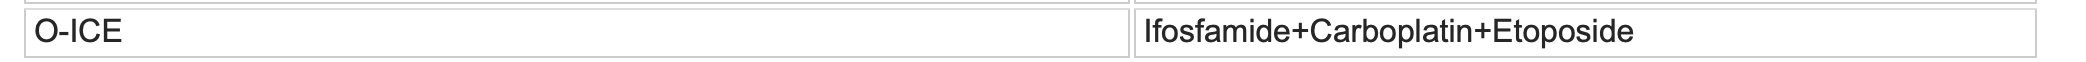

In [1]:
from rdkit.Chem import AllChem, DataStructs

RDKit WARNING: [23:02:04] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from urllib.request import urlopen
from urllib.parse import urlencode

def convert_drug_to_smiles(drug):
    try:
        params = urlencode({'q': drug})
        drug_name_escaped = params[2:]
        url = 'https://cactus.nci.nih.gov/chemical/structure/' + drug_name_escaped + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return None

In [96]:
drugs = pd.read_csv('data/GDC-clinical/processed/patient_drug_standardized.csv')
drugs['standard_drug_name'] = drugs['standard_drug_name'].str.strip(" '") # remove space and ' in drugname
drugs['standard_drug_name'] = drugs['standard_drug_name'].str.replace(' -', '-')

In [97]:
drugs['standard_drug_name'] = drugs['standard_drug_name'].str.split('+')
drugs = drugs.set_index(drugs.columns[:-1].tolist())['standard_drug_name'].apply(pd.Series).stack().reset_index().drop('level_9', axis=1).rename(columns={0: 'standard_drug_name'})
drugs.to_csv('data/GDC-clinical/processed/patient_drug_standardized_exploded.csv', index=False)

In [93]:
drugs_exploded = pd.read_csv('data/GDC-clinical/processed/patient_drug_standardized_exploded.csv')

In [ ]:
%%time
drug_list = sorted(drugs_exploded['standard_drug_name'].unique())
convert_result = []
for drug in drug_list:
    if drug == 'NOS':
        convert_result.append([drug, 'NA'])
    else:
        smile = convert_drug_to_smiles(drug)
        convert_result.append([drug, smile])

In [ ]:
df = pd.DataFrame(convert_result)

In [9]:
df.to_csv('data/GDC-clinical/processed/drug_to_smile.csv', index=False, header=None)

In [3]:
curated_drug_to_smile = pd.read_csv('data/GDC-clinical/processed/drug_to_smile.csv', header=None, names=['name', 'smile'])

In [4]:
curated_drug_to_smile = curated_drug_to_smile.dropna()

In [5]:
drug2smile = dict(zip(curated_drug_to_smile['name'], curated_drug_to_smile['smile']))

In [6]:
smiles = list(drug2smile.values())

In [7]:
len(smiles)

178

#### Training data
- drug2fingerprint.txt
- drug2ind.txt
- drugcell_on.txt

In [31]:
'''data needed:
smiles: List[str], a list of drug SMILES
'''

smiles_parsed = []
drug2fingerprint = []
for sml in smiles:
    if sml is None: continue
    try:
        mol = AllChem.MolFromSmiles(sml)
        finger_print = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        arr = np.zeros((0,), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(finger_print, arr)
        drug2fingerprint.append(arr)
        smiles_parsed.append(sml)
    except:
        print(f'RDkit parse fail for {sml}')

# drug2fingerprint.txt 
drug2fingerprint = np.stack(drug2fingerprint, axis=0)        
np.savetxt('/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/drug2fingerprint.txt', drug2fingerprint, '%s', delimiter=',')

# drug2ind.txt
with open('/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/drug2ind.txt', 'wt') as drug2ind:
    for i, sml in enumerate(smiles_parsed):
        drug2ind.write(f'{i}\t{sml}\n')

# drugcell_on.txt
shutil.copy('/Users/bsun/repos/DrugCell/data/drugcell_ont.txt', '/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/drugcell_ont.txt')

'data needed:\nsmiles: List[str], a list of drug SMILES\n'

RDkit parse fail for [Co+3]|[C-]#N.C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N=C1C(=C3[N-]C(=CC4=NC(=C(C)C5=N[C@]2(C)[C@@](C)(CC(N)=O)[C@@H]5CCC(N)=O)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)C(C)(C)[C@@H]3CCC(N)=O)C)O[P]([O-])(=O)O[C@H]6[C@@H](O)[C@H](O[C@@H]6CO)n7cnc8cc(C)c(C)cc78


RDKit ERROR: [22:28:04] SMILES Parse Error: syntax error while parsing: [Co+3]|[C-]#N.C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N=C1C(=C3[N-]C(=CC4=NC(=C(C)C5=N[C@]2(C)[C@@](C)(CC(N)=O)[C@@H]5CCC(N)=O)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)C(C)(C)[C@@H]3CCC(N)=O)C)O[P]([O-])(=O)O[C@H]6[C@@H](O)[C@H](O[C@@H]6CO)n7cnc8cc(C)c(C)cc78
RDKit ERROR: [22:28:04] SMILES Parse Error: Failed parsing SMILES '[Co+3]|[C-]#N.C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N=C1C(=C3[N-]C(=CC4=NC(=C(C)C5=N[C@]2(C)[C@@](C)(CC(N)=O)[C@@H]5CCC(N)=O)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)C(C)(C)[C@@H]3CCC(N)=O)C)O[P]([O-])(=O)O[C@H]6[C@@H](O)[C@H](O[C@@H]6CO)n7cnc8cc(C)c(C)cc78' for input: '[Co+3]|[C-]#N.C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N=C1C(=C3[N-]C(=CC4=NC(=C(C)C5=N[C@]2(C)[C@@](C)(CC(N)=O)[C@@H]5CCC(N)=O)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)C(C)(C)[C@@H]3CCC(N)=O)C)O[P]([O-])(=O)O[C@H]6[C@@H](O)[C@H](O[C@@H]6CO)n7cnc8cc(C)c(C)cc78'
RDKit WARNING: [22:28:04] WARNING: not removing hydrogen atom without neighb

40

19

80

70

70

79

30

22

159

57

25

44

51

43

69

46

63

116

192

60

57

47

259

76

54

124

65

47

24

54

54

34

97

26

53

29

173

55

80

29

182

59

228

91

25

30

160

53

101

102

101

55

113

199

47

65

47

20

90

39

98

69

39

50

53

23

171

158

80

12

43

27

64

32

86

48

51

98

69

73

162

73

45

38

40

74

162

49

62

36

28

75

80

74

36

28

32

67

72

90

54

37

55

48

135

56

36

34

69

40

30

41

92

160

69

50

36

147

99

72

68

55

9

261

176

80

77

30

19

58

69

123

74

40

132

64

58

62

60

54

60

190

50

85

30

30

138

97

170

40

29

27

71

63

69

66

52

131

84

41

179

20

227

50

43

40

76

149

151

199

32

59

41

51

37

71

101

'/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/drugcell_ont.txt'

In [32]:
to_pop = []
for k, v in drug2smile.items():
    if v not in smiles_parsed:
        to_pop.append(k)

In [33]:
to_pop  # pop the drug whose smile failed to be parsed

['Cyanocobalamin']

In [34]:
for x in to_pop:
    drug2smile.pop(x)

'[Co+3]|[C-]#N.C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N=C1C(=C3[N-]C(=CC4=NC(=C(C)C5=N[C@]2(C)[C@@](C)(CC(N)=O)[C@@H]5CCC(N)=O)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)C(C)(C)[C@@H]3CCC(N)=O)C)O[P]([O-])(=O)O[C@H]6[C@@H](O)[C@H](O[C@@H]6CO)n7cnc8cc(C)c(C)cc78'

In [35]:
# by far, drug2smile, drug2fingerprint, and drug2ind contains drugs with smiles with morgan fingerprint

# metadata (turn out sample sheet is sufficient)

advanced search query command: 
 - cases.demographic.gender in ["female"] and cases.project.program.name in ["TCGA"] and files.analysis.workflow_type in ["HTSeq - FPKM-UQ"] and files.data_type in ["Gene Expression Quantification"]
 - cases.demographic.gender in ["male"] and cases.project.program.name in ["TCGA"] and files.analysis.workflow_type in ["HTSeq - FPKM-UQ"] and files.data_type in ["Gene Expression Quantification"]

In [52]:
meta_male

[{'data_format': 'TXT',
  'access': 'open',
  'associated_entities': [{'entity_submitter_id': 'TCGA-CV-7103-11A-01R-2016-07',
    'entity_type': 'aliquot',
    'case_id': '1dd23cd6-3aa8-4553-8813-04701451846e',
    'entity_id': '11fd48af-c06d-4fb0-9643-51cfe19a978f'}],
  'file_name': '3684c680-68bc-4a84-b8f9-13142c6276e6.FPKM-UQ.txt.gz',
  'submitter_id': '3684c680-68bc-4a84-b8f9-13142c6276e6_uqfpkm',
  'data_category': 'Transcriptome Profiling',
  'analysis': {'workflow_version': 'v1',
   'input_files': [{'data_format': 'BAM',
     'access': 'controlled',
     'file_name': '880100fc-0dd1-4ffe-b30a-aa48d73fac38_gdc_realn_rehead.bam',
     'submitter_id': '880100fc-0dd1-4ffe-b30a-aa48d73fac38',
     'data_category': 'Sequencing Reads',
     'platform': 'Illumina',
     'created_datetime': '2016-05-26T12:03:19.384604-05:00',
     'file_size': 10031967422,
     'md5sum': '85cd8adbe45669685f15b2f95a708b95',
     'updated_datetime': '2018-11-15T20:57:47.372612-06:00',
     'file_id': '6504c

In [36]:
! cat /Users/bsun/repos/DepMap/download/female_manifest.txt | wc -l
! cat /Users/bsun/repos/DepMap/download/male_manifest.txt | wc -l

    5126
    4615


In [37]:
meta_female = json.load(open('/Users/bsun/repos/DepMap/download/metadata_female.json'))
meta_male = json.load(open('/Users/bsun/repos/DepMap/download/metadata_male.json'))

In [38]:
for k, v in meta_female[0].items():
    print(k, v)

data_format TXT
access open
associated_entities [{'entity_submitter_id': 'TCGA-AB-2867-03A-01T-0734-13', 'entity_type': 'aliquot', 'case_id': '8eee4228-4d30-480a-8743-5a3d98eb1741', 'entity_id': '55c2d74b-09ea-489b-89b4-f522add07c17'}]
file_name ce4f46a0-e117-4cac-b0d4-4195f806c523.FPKM-UQ.txt.gz
submitter_id ce4f46a0-e117-4cac-b0d4-4195f806c523_uqfpkm
data_category Transcriptome Profiling
annotations [{'entity_submitter_id': 'TCGA-AB-2867', 'notes': 'Biospecimens from this case belong to Batch 25 and were processed into analyte outside of the normal TCGA standardized laboratory pipeline.  Users should note that the resulting characterization data may exhibit features (e.g. batch effects) due to this difference.', 'submitter_id': '12308', 'entity_id': '8eee4228-4d30-480a-8743-5a3d98eb1741', 'classification': 'Notification', 'created_datetime': '2012-11-13T00:00:00', 'annotation_id': 'fc6e6752-55ac-577d-9b39-b08fa307ae2e', 'entity_type': 'case', 'updated_datetime': '2018-08-23T16:36:27.

In [39]:
filename2patient = {}

In [40]:
entity_type = []
for meta in meta_female:
    if not len(meta['associated_entities']) == 1:
        continue
    entity_type.append(meta['associated_entities'][0]['entity_type'])
    if not meta['associated_entities'][0]['entity_submitter_id'].startswith('TCGA'):  # 
        continue
    filename2patient[meta['file_name']] = meta['associated_entities'][0]['entity_submitter_id'][:12]
    
set(entity_type)  # entity_type are all aliquot

{'aliquot'}

In [41]:
for meta in meta_male:
    if not len(meta['associated_entities']) == 1:
        continue
    if not meta['associated_entities'][0]['entity_submitter_id'].startswith('TCGA'):
        continue
    filename2patient[meta['file_name']] = meta['associated_entities'][0]['entity_submitter_id'][:12]

In [42]:
len(set(filename2patient.values()))

10198

In [43]:
np.isin(
    np.array(list(set(filename2patient.values())), dtype=object),
    drugs['bcr_patient_barcode'].unique()
).sum()

3741

In [457]:
with open('data/GDC-clinical/processed/filename2patient.pkl', 'wb') as f:
    pickle.dump(filename2patient, f)

In [45]:
%store filename2patient

Stored 'filename2patient' (dict)


**3744 patients have FPKM-UQ data**

# sample sheets

In [1]:
with open('data/GDC-clinical/processed/filename2patient.pkl', 'rb') as f:
    filename2patient = pickle.load(f)

In [2]:
%store -r filename2patient

In [3]:
male_ss = pd.read_csv('/Users/bsun/repos/DepMap/download/sample_sheet_male.tsv', sep='\t')
female_ss = pd.read_csv('/Users/bsun/repos/DepMap/download/sample_sheet_female.tsv', sep='\t')
sample_sheets = pd.concat([male_ss, female_ss])

In [4]:
sample_sheets['Sample Type'].value_counts()

Primary Tumor                                      9738
Solid Tissue Normal                                 713
Metastatic                                          393
Primary Blood Derived Cancer - Peripheral Blood     151
Recurrent Tumor                                      47
Additional - New Primary                             10
Additional Metastatic                                 1
Name: Sample Type, dtype: int64

In [11]:
sample_sheets.to_csv('/Users/bsun/repos/DepMap/data/sample_sheets.csv')

In [5]:
project_to_cancer = pd.read_csv('/Users/bsun/repos/DepMap/data/TCGA_project_ID.tsv', sep='\t', header=None)

In [6]:
sample_sheets

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,a259b4c1-4c3c-4d25-9a15-9017006025b2,3684c680-68bc-4a84-b8f9-13142c6276e6.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-HNSC,TCGA-CV-7103,TCGA-CV-7103-11A,Solid Tissue Normal
1,5db44bba-97b3-47b1-b561-e5b77a4bf02e,c65051d8-4815-4a9d-be65-de1aa152a346.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-HNSC,TCGA-CV-7247,TCGA-CV-7247-01A,Primary Tumor
2,c510ba42-c8f6-407f-9662-35e156c4e442,6c4b3467-bf5a-4241-a580-44eea16df109.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-CJ-6030,TCGA-CJ-6030-11A,Solid Tissue Normal
3,81dd020d-5936-4ae8-86b1-c04c1b8b4800,6e2123ba-f414-492b-b3ea-76cdb8b49da7.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-BP-4994,TCGA-BP-4994-01A,Primary Tumor
4,10298e1d-b02c-43f1-a9af-8a280f7d630a,6c5413ca-9b83-44f8-9f08-2e70035bcc9a.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-THCA,TCGA-MK-A84Z,TCGA-MK-A84Z-01A,Primary Tumor
...,...,...,...,...,...,...,...,...
5719,52548899-c432-4243-8d68-10e9a2e37eca,7a8e67ae-ec7c-4528-a625-ad298052b529.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-UCS,TCGA-NF-A4WX,TCGA-NF-A4WX-01A,Primary Tumor
5720,fd094572-9201-4aa0-bbaa-e25b27a0f227,7fb4f0f7-027f-4cf8-b8bc-43ca398c46e8.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-OV,TCGA-24-2261,TCGA-24-2261-01A,Primary Tumor
5721,999f1eeb-60a1-4b5d-aa5e-608ca61d555a,b8781416-020e-4af5-b33b-2604f67e17d8.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-UCS,TCGA-NA-A4QX,TCGA-NA-A4QX-01A,Primary Tumor
5722,92cb453b-d76e-4503-922b-642bc409e181,78c27c9c-843b-4e6a-a36a-1aa4dcb8decf.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TCGA-OV,TCGA-25-1321,TCGA-25-1321-01A,Primary Tumor


In [7]:
project_id = project_to_cancer[0].apply(lambda x: x.split()[0])
cancer = project_to_cancer[0].apply(lambda x: x.split()[1])
pid2cancer = dict(zip(project_id, cancer))

In [8]:
pid2cancer

{'LAML': 'Acute',
 'ACC': 'Adrenocortical',
 'BLCA': 'Bladder',
 'LGG': 'Brain',
 'BRCA': 'Breast',
 'CESC': 'Cervical',
 'CHOL': 'Cholangiocarcinoma',
 'LCML': 'Chronic',
 'COAD': 'Colon',
 'CNTL': 'Controls',
 'ESCA': 'Esophageal',
 'FPPP': 'FFPE',
 'GBM': 'Glioblastoma',
 'HNSC': 'Head',
 'KICH': 'Kidney',
 'KIRC': 'Kidney',
 'KIRP': 'Kidney',
 'LIHC': 'Liver',
 'LUAD': 'Lung',
 'LUSC': 'Lung',
 'DLBC': 'Lymphoid',
 'MESO': 'Mesothelioma',
 'MISC': 'Miscellaneous',
 'OV': 'Ovarian',
 'PAAD': 'Pancreatic',
 'PCPG': 'Pheochromocytoma',
 'PRAD': 'Prostate',
 'READ': 'Rectum',
 'SARC': 'Sarcoma',
 'SKCM': 'Skin',
 'STAD': 'Stomach',
 'TGCT': 'Testicular',
 'THYM': 'Thymoma',
 'THCA': 'Thyroid',
 'UCS': 'Uterine',
 'UCEC': 'Uterine',
 'UVM': 'Uveal'}

In [4]:
import pickle

with open('/Users/bsun/repos/DepMap/data/TCGA_project_ID.pkl', 'wb') as handle:
    pickle.dump(pid2cancer, handle)

In [39]:
len(data)

33

In [10]:
drugs = pd.read_csv('data/GDC-clinical/processed/patient_drug_standardized.csv')
clinical = pd.read_csv('/Users/bsun/repos/DepMap/data/GDC-clinical/clinical.cart.2021-03-31/clinical.tsv', sep='\t')
clinical_with_drugs = clinical[clinical['case_submitter_id'].isin(drugs['bcr_patient_barcode'])]
clinical_with_drugs_dedup = clinical_with_drugs.drop_duplicates('case_submitter_id')

In [14]:
ss_drug = sample_sheets[sample_sheets['Case ID'].isin(clinical_with_drugs_dedup['case_submitter_id'])]

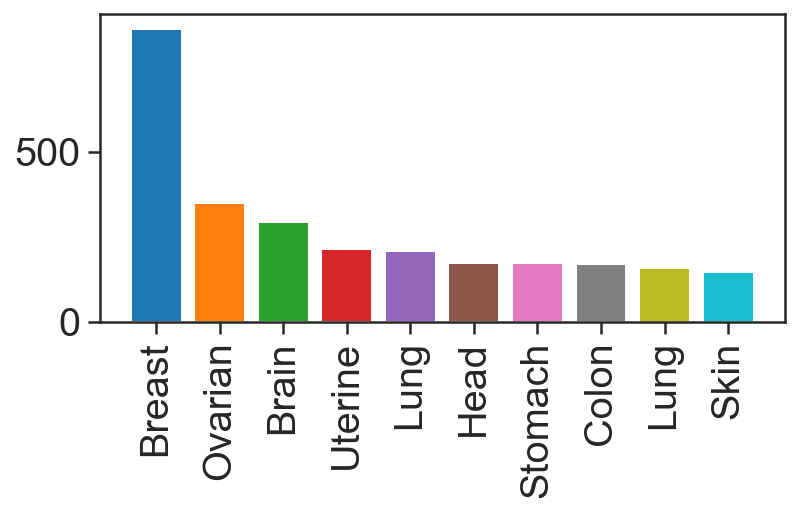

In [15]:
import seaborn as sns
data = ss_drug['Project ID'].apply(lambda x: x.split('-')[1]).value_counts()
x = data.index.tolist()
x = [pid2cancer[_] for _ in x]
y = data.values
sns.set(style='ticks', context='notebook', font_scale=1.8)
fig, ax = plt.subplots()
_ = ax.bar(np.arange(10), y[:10], color=sns.color_palette("tab10"))
_ = ax.set_xticks(np.arange(10))
_ = ax.set_xticklabels(x[:10], rotation=90)
fig.tight_layout()
fig.savefig('/Users/bsun/Library/Mobile Documents/com~apple~CloudDocs/Repos/DepMap/plots/mpl/cancer_pid_drug.pdf')

In [14]:
[pid2cancer[p] for p in sample_sheets['Project ID'].apply(lambda x: x.split('-')[1]).value_counts().index]

NameError: name 'pid2cancer' is not defined

In [75]:
sample_sheets = sample_sheets[sample_sheets['Sample Type'] == 'Primary Tumor']

In [50]:
sample_sheets.to_csv('data/GDC-clinical/processed/sample_sheets.csv')

In [75]:
%store sample_sheets

Stored 'sample_sheets' (DataFrame)


In [72]:
meta_male[1]

{'data_format': 'TXT',
 'access': 'open',
 'associated_entities': [{'entity_submitter_id': 'TCGA-CV-7247-01A-11R-2016-07',
   'entity_type': 'aliquot',
   'case_id': '5e25ab76-a8ab-4779-aa03-8de658f18da1',
   'entity_id': '309829bc-7c35-4d8b-a89d-85e034dd3685'}],
 'file_name': 'c65051d8-4815-4a9d-be65-de1aa152a346.FPKM-UQ.txt.gz',
 'submitter_id': 'c65051d8-4815-4a9d-be65-de1aa152a346_uqfpkm',
 'data_category': 'Transcriptome Profiling',
 'analysis': {'workflow_version': 'v1',
  'input_files': [{'data_format': 'BAM',
    'access': 'controlled',
    'file_name': 'b1f474ab-da46-4027-9a3b-d47bcbb248ad_gdc_realn_rehead.bam',
    'submitter_id': 'b1f474ab-da46-4027-9a3b-d47bcbb248ad',
    'data_category': 'Sequencing Reads',
    'platform': 'Illumina',
    'created_datetime': '2016-05-28T19:09:47.168949-05:00',
    'file_size': 9991547055,
    'md5sum': '1136b3306a129fd7e076e735ba090a70',
    'updated_datetime': '2018-11-15T21:12:37.513272-06:00',
    'file_id': '8061227b-b1c1-435c-8f6f-082

# expression

In [245]:
manifest = pd.read_csv('/Users/bsun/repos/DepMap/download/male_manifest.txt', sep='\t')

In [246]:
manifest['filename'].str.rstrip('.FPKM-UQ.txt.gz')

0       3684c680-68bc-4a84-b8f9-13142c6276e6
1       c65051d8-4815-4a9d-be65-de1aa152a346
2       6c4b3467-bf5a-4241-a580-44eea16df109
3       6e2123ba-f414-492b-b3ea-76cdb8b49da7
4       6c5413ca-9b83-44f8-9f08-2e70035bcc9a
                        ...                 
5324    2c4b2061-90b5-4ce2-a388-b666702d81d4
5325    37355f52-90e5-43e8-a473-0d3bad45a394
5326    0622c348-1f05-4f21-8486-d5bb9399f7be
5327    576e9685-ed5f-4ed1-9f27-da74d142d65c
5328    39701843-3dae-4114-b04c-b3387e402e4f
Name: filename, Length: 5329, dtype: object

In [251]:
finished = [x.split('/')[-1] for x in glob.glob('/Users/bsun/repos/DepMap/data/GDC-FPKM-UQ/*')]
manifest = manifest[~manifest['id'].isin(finished)]

In [253]:
manifest.to_csv('/Users/bsun/repos/DepMap/download/male_manifest.txt', sep='\t', index=False)

In [254]:
manifest = pd.read_csv('/Users/bsun/repos/DepMap/download/female_manifest.txt', sep='\t')

In [255]:
manifest['filename'].str.rstrip('.FPKM-UQ.txt.gz')

0       ce4f46a0-e117-4cac-b0d4-4195f806c523
1       b5350dd7-4f8e-4043-9957-c7726825f48f
2       8e8015bc-ba25-4932-a8ac-e1ae1329d296
3       0a77f02e-4760-4f1f-bfca-0c5a07da89bc
4       c0fedec6-1287-4927-ba54-e8aa61135c14
                        ...                 
5719    7a8e67ae-ec7c-4528-a625-ad298052b529
5720    7fb4f0f7-027f-4cf8-b8bc-43ca398c46e8
5721    b8781416-020e-4af5-b33b-2604f67e17d8
5722    78c27c9c-843b-4e6a-a36a-1aa4dcb8decf
5723    32bd99f2-eefe-4dbf-ac0b-dcbe1d0da9d4
Name: filename, Length: 5724, dtype: object

In [256]:
finished = [x.split('/')[-1] for x in glob.glob('/Users/bsun/repos/DepMap/data/GDC-FPKM-UQ/*')]
manifest = manifest[~manifest['id'].isin(finished)]

In [258]:
manifest.to_csv('/Users/bsun/repos/DepMap/download/female_manifest.txt', sep='\t', index=False)

In [259]:
! cat /Users/bsun/repos/DepMap/download/female_manifest.txt | wc -l
! cat /Users/bsun/repos/DepMap/download/male_manifest.txt | wc -l

    5126
    4615


In [16]:
female_manifest = pd.read_csv('/Users/bsun/repos/DepMap/download/female_manifest.txt', sep='\t')
male_manifest = pd.read_csv('/Users/bsun/repos/DepMap/download/male_manifest.txt', sep='\t')

In [19]:
male_manifest['filename'].isin(ss_drug['File Name']).sum()

1290

In [20]:
female_manifest['filename'].isin(ss_drug['File Name']).sum()

2237

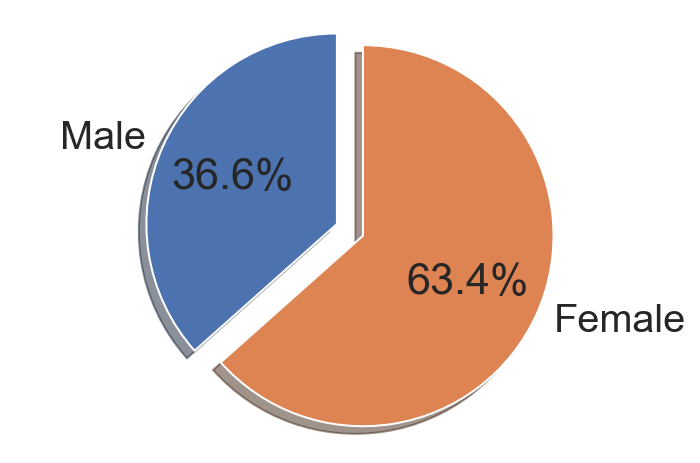

In [23]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [1290, 2237]
explode = (0, 0.15)

fig, ax = plt.subplots()
_ = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
_ = ax.axis('equal')  # Equal aspect ratio ensures that pie is dwrawn as a circle.
fig.savefig('/Users/bsun/Library/Mobile Documents/com~apple~CloudDocs/Repos/DepMap/plots/mpl/sex_drug.pdf')

In [ ]:
./gdc-client download -m ../download/male_manifest.txt -d /Users/bsun/repos/DepMap/data/GDC-FPKM-UQ
./gdc-client download -m ../download/female_manifest.txt -d /Users/bsun/repos/DepMap/data/GDC-FPKM-UQ

In [18]:
'''get all gene names for TCGA RNA-seq data'''
# genes = expr.index.tolist()

# genes = [x.split('.')[0] for x in genes]

# out = mg.querymany(genes, scopes='ensembl.gene', fields='symbol', species='human')
# out.pop(13237)
# out.pop(58556)

dcell_genes = pd.read_csv('/Users/bsun/repos/DrugCell/data/gene2ind.txt', sep='\t', header=None, names=['id', 'name'])
dcell_gene_set = set(dcell_genes['name'])

# keep = []
# symbols = []
# seen = set()
# for i, rec in enumerate(out):
#     if 'symbol' in rec and rec['symbol'] in dcell_gene_set and rec['symbol'] not in seen:
#         keep.append(True)
#         symbols.append(rec['symbol'])
#         seen.add(rec['symbol'])
#     else:
#         keep.append(False)
#         symbols.append('NA')
# symbols = np.array(symbols)

'get all gene names for TCGA RNA-seq data'

In [76]:
'''
%store symbols
%store keep
'''

Stored 'symbols' (ndarray)
Stored 'keep' (list)


In [4]:
%store -r sample_sheets

In [5]:
%store -r symbols
%store -r keep

In [10]:
path_to_fpkm = '/Users/bsun/repos/DepMap/data/GDC-FPKM-UQ'

In [11]:
path_to_fpkm

'/Users/bsun/repos/DepMap/data/GDC-FPKM-UQ'

In [12]:
to_exclude = [i for i, x in enumerate(keep) if x is False]   # only keep 3008 drug cell genes

In [ ]:
%%time
expr = None
for idx, row in sample_sheets.iterrows():  # consider primary tumor only
    if os.path.exists(os.path.join(path_to_fpkm, row['File ID'])):
        df = pd.read_csv(os.path.join(path_to_fpkm, row['File ID'], row['File Name']), sep='\t', header=None, skiprows=to_exclude)
        df = df.set_index(0)
        df.columns = [row['Case ID']]
        if expr is None:
            expr = df
        else:
            expr = pd.concat([expr, df], axis=1)

In [14]:
expr = np.log(expr + 1.)

In [ ]:
expr.index = symbols[keep]

In [19]:
expr = expr.reindex(dcell_genes['name'])

In [ ]:
expr=expr.fillna(expr.mean())

# survival data

In [54]:
drugs = pd.read_csv('data/GDC-clinical/processed/patient_drug_standardized.csv')
clinical = pd.read_csv('/Users/bsun/repos/DepMap/data/GDC-clinical/clinical.cart.2021-03-31/clinical.tsv', sep='\t')

In [55]:
clinical_with_drugs = clinical[clinical['case_submitter_id'].isin(drugs['bcr_patient_barcode'])]

In [6]:
for x, y in zip(clinical_with_drugs.iloc[0], clinical_with_drugs.iloc[1]):
    if x != y :
        print(x, y)

Radiation Therapy, NOS Pharmaceutical Therapy, NOS


In [25]:
clinical_with_drugs_dedup = clinical_with_drugs.drop_duplicates('case_submitter_id')

(vital_status
 Alive           2666
 Dead            1645
 Not Reported       3
 dtype: int64,
 <AxesSubplot:xlabel='vital_status'>)

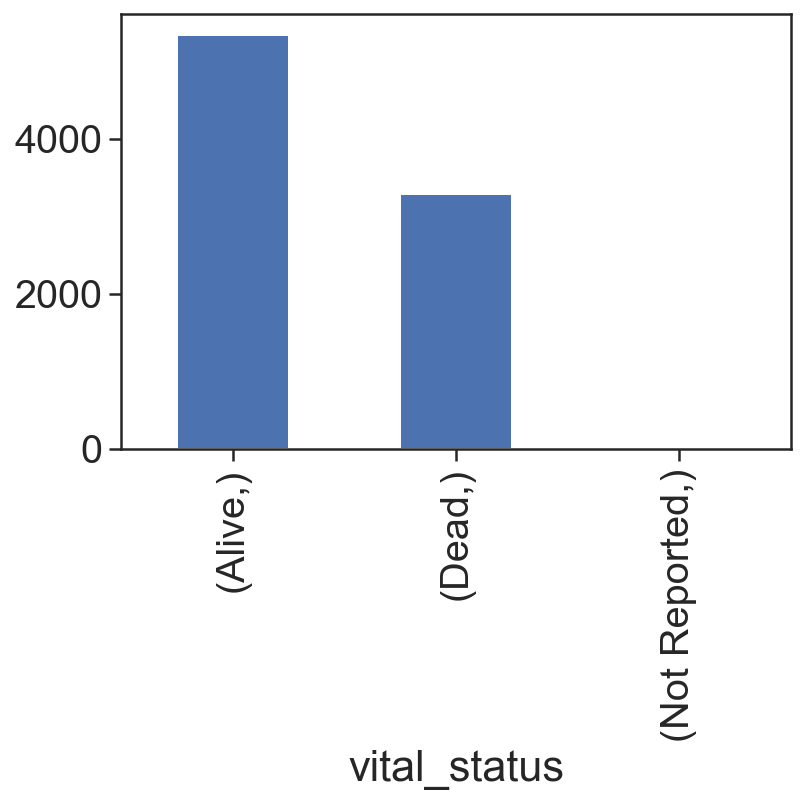

In [26]:
clinical_with_drugs_dedup.filter(like='vital').value_counts(), clinical_with_drugs.filter(like='vital').value_counts().plot(kind='bar')

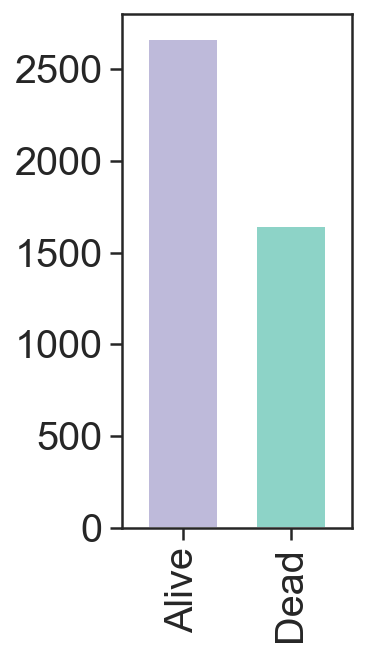

In [27]:
import seaborn as sns
sns.set(style='ticks', context='notebook', font_scale=1.8)
fig, ax = plt.subplots(figsize=(3, 5))
y = [2666, 1645]
xlabels = ['Alive', 'Dead']
_ = ax.bar(np.arange(2), y, color=[sns.color_palette("Set3")[2], sns.color_palette("Set3")[0]], width=.65)
_ = ax.set_xticks([0, 1])
_ = ax.set_xticklabels(xlabels, rotation=90)
ax.margins(x=0.15)
fig.tight_layout()
fig.savefig('/Users/bsun/Library/Mobile Documents/com~apple~CloudDocs/Repos/DepMap/plots/mpl/vital_status_drug.pdf')

In [28]:
dead_patient = clinical_with_drugs_dedup[clinical_with_drugs_dedup['vital_status'] == 'Dead'].drop_duplicates(subset=['case_submitter_id', 'days_to_death'])
dead_patient = dead_patient[dead_patient['days_to_death']!="'--"]
dead_patient['days_to_death'] = dead_patient['days_to_death'].astype(int)

(count    1634.000000
 mean      905.179315
 std       831.535952
 min         0.000000
 25%       373.500000
 50%       634.500000
 75%      1166.000000
 max      6972.000000
 Name: days_to_death, dtype: float64,
 <AxesSubplot:>)

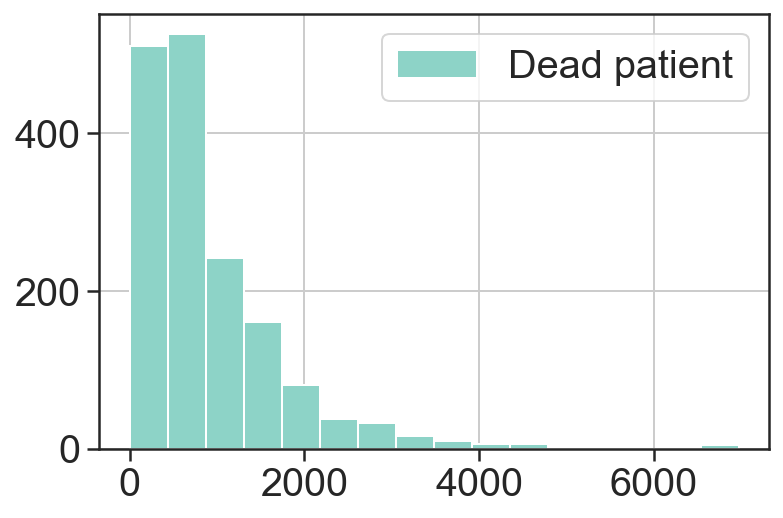

In [29]:
fig, ax = plt.subplots()
dead_patient['days_to_death'].describe(),dead_patient['days_to_death'].hist(ax=ax, bins=16, color=sns.color_palette('Set3')[0], label='Dead patient')
ax.legend()
fig.savefig('/Users/bsun/Library/Mobile Documents/com~apple~CloudDocs/Repos/DepMap/plots/mpl/days_to_death_drug.pdf')

In [268]:
(dead_patient['days_to_death'] < 365*3).mean()

0.7239902080783354

In [9]:
clinical_with_drugs[clinical_with_drugs['vital_status'] == 'Alive'].filter(like='days')
clinical_with_drugs[clinical_with_drugs['vital_status'] == 'Alive']['days_to_treatment_start'].value_counts()
clinical_with_drugs[clinical_with_drugs['vital_status'] == 'Alive']['days_to_best_overall_response'].value_counts()
clinical_with_drugs[clinical_with_drugs['vital_status'] == 'Alive']['days_to_diagnosis'].value_counts()
clinical_with_drugs[clinical_with_drugs['vital_status'] == 'Alive']['days_to_last_follow_up'].value_counts()

,days_to_birth,days_to_death,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,days_to_treatment_end,days_to_treatment_start
0,-24745,'--,'--,0,0,'--,'--,'--,'--
1,-24745,'--,'--,0,0,'--,'--,'--,'--
4,-22702,'--,'--,0,1490,'--,'--,'--,'--
5,-22702,'--,'--,0,1490,'--,'--,'--,'--
8,-21115,'--,'--,0,3846,'--,'--,'--,'--
...,...,...,...,...,...,...,...,...,...
22297,-21648,'--,'--,0,499,'--,'--,'--,'--
22300,-25870,'--,'--,0,872,'--,'--,'--,'--
22301,-25870,'--,'--,0,872,'--,'--,'--,'--
22306,-19310,'--,'--,0,174,'--,'--,'--,'--


'--    5332
Name: days_to_treatment_start, dtype: int64

'--    5332
Name: days_to_best_overall_response, dtype: int64

0      5288
'--      44
Name: days_to_diagnosis, dtype: int64

365     16
943     16
791     16
0       16
396     16
        ..
3988     2
1361     2
311      2
2439     2
1079     2
Name: days_to_last_follow_up, Length: 1558, dtype: int64

In [30]:
alive_patient = clinical_with_drugs_dedup[clinical_with_drugs_dedup['vital_status'] == 'Alive']
alive_patient = alive_patient.drop_duplicates(subset=['case_submitter_id', 'days_to_last_follow_up'])
alive_patient = alive_patient[alive_patient['days_to_last_follow_up']!="'--"]
alive_patient['days_to_last_follow_up'] = alive_patient['days_to_last_follow_up'].astype('int')
alive_patient = alive_patient[alive_patient['days_to_last_follow_up'] != 0]

(count     2651.000000
 mean      1187.846473
 std       1061.553220
 min         16.000000
 25%        498.000000
 50%        847.000000
 75%       1522.500000
 max      11252.000000
 Name: days_to_last_follow_up, dtype: float64,
 <AxesSubplot:>)

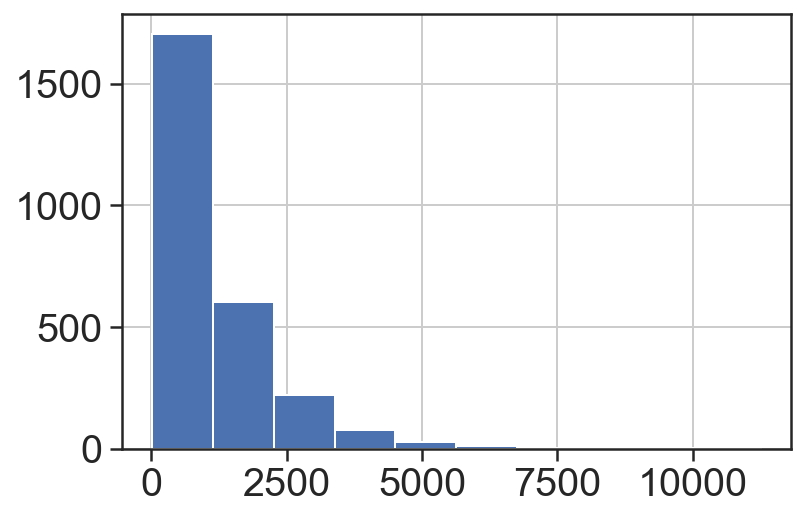

In [31]:
alive_patient['days_to_last_follow_up'].describe(),alive_patient['days_to_last_follow_up'].hist()

(count     2651.000000
 mean      1187.846473
 std       1061.553220
 min         16.000000
 25%        498.000000
 50%        847.000000
 75%       1522.500000
 max      11252.000000
 Name: days_to_last_follow_up, dtype: float64,
 <AxesSubplot:>)

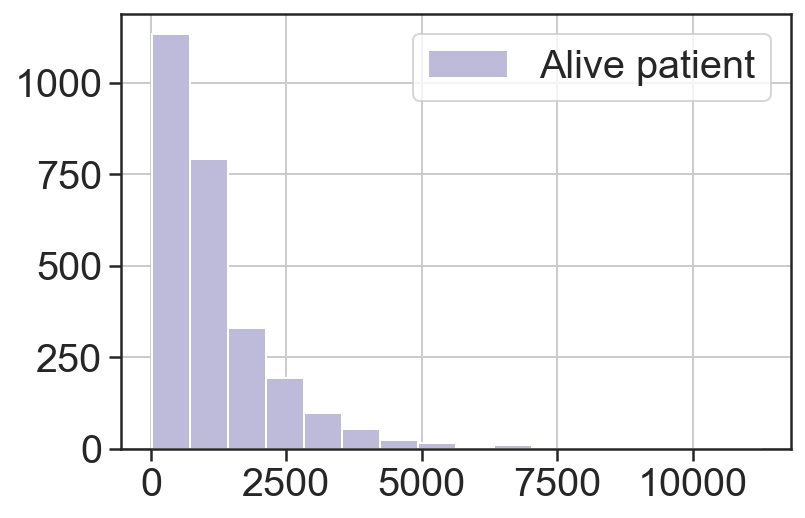

In [33]:
fig, ax = plt.subplots()
alive_patient['days_to_last_follow_up'].describe(),alive_patient['days_to_last_follow_up'].hist(ax=ax, bins=16, color=sns.color_palette('Set3')[2], label='Alive patient')
ax.legend()
fig.savefig('/Users/bsun/Library/Mobile Documents/com~apple~CloudDocs/Repos/DepMap/plots/mpl/days_to_last_follow_up_drug.pdf')

In [256]:
(alive_patient['days_to_last_follow_up'] > 365*3).sum()

1002

In [17]:
# 365*3 = 3 years, implementated by < 1000 and > 1200 to hope for a more clear decision boundary
# short_life = dead_patient[dead_patient['days_to_death'] < 365*3]
short_life = dead_patient[dead_patient['days_to_death'] < 1000]
# long_life = pd.concat([dead_patient[dead_patient['days_to_death'] < 365*3], alive_patient[alive_patient['days_to_last_follow_up']>365*3]], axis=0)
long_life = pd.concat([
    dead_patient[dead_patient['days_to_death'] > 1000], 
    alive_patient[alive_patient['days_to_last_follow_up']>1000]
], axis=0)

In [19]:
#short 1121, long 1278, 
1631 - 1278

353

In [23]:
dead_patient[dead_patient['days_to_death'] > 1200].shape

(392, 154)

In [22]:
long_life.filter(like='days')

,days_to_birth,days_to_death,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,days_to_treatment_end,days_to_treatment_start
156,-25508,1714,'--,0,'--,'--,'--,'--,'--
180,-24626,1771,'--,0,'--,'--,'--,'--,'--
258,-27417,2621,'--,0,2621,'--,'--,'--,'--
260,-24471,2688,'--,0,2688,'--,'--,'--,'--
286,-21972,1321,'--,0,1321,'--,'--,'--,'--
...,...,...,...,...,...,...,...,...,...
22248,-17471,'--,'--,0,1431,'--,'--,'--,'--
22278,-22236,'--,'--,0,1036,'--,'--,'--,'--
22282,-27913,'--,'--,0,1285,'--,'--,'--,'--
22288,-19426,'--,'--,0,1013,'--,'--,'--,'--


In [287]:
dead_patient['months_to_death'] = dead_patient['days_to_death'] / 30
dead_patient['months_to_death_int'] = dead_patient['months_to_death'].round()

In [289]:
short_life.to_csv('data/GDC-data-prep/short_life.csv')
long_life.to_csv('data/GDC-data-prep/long_life.csv')
dead_patient.to_csv('data/GDC-data-prep/dead_patient.csv')

In [2]:
short_life = pd.read_csv('data/GDC-data-prep/short_life.csv')

In [37]:
dead_patient = pd.read_csv('data/GDC-data-prep/dead_patient.csv')

In [46]:
dead_patient['case_submitter_id'].shape

(1634,)

In [45]:
sample_sheets['Case ID'].isin(dead_patient['case_submitter_id']).sum()

1191

# prepare training data for dead patient

In [32]:
dead_patient = pd.read_csv('data/GDC-data-prep/dead_patient.csv')

In [4]:
%store -r sample_sheets

In [5]:
%store -r symbols
%store -r keep

In [69]:
%store dcell_genes

Stored 'dcell_genes' (DataFrame)


In [10]:
path_to_fpkm = '/Users/bsun/repos/DepMap/data/GDC-FPKM-UQ'

In [11]:
path_to_fpkm

'/Users/bsun/repos/DepMap/data/GDC-FPKM-UQ'

In [12]:
to_exclude = [i for i, x in enumerate(keep) if x is False]   # only keep 3008 drug cell genes

In [104]:
%%time
expr = None
for idx, row in sample_sheets.iterrows():  # consider primary tumor only
    if os.path.exists(os.path.join(path_to_fpkm, row['File ID'])):
        if np.isin(row['Case ID'], dead_patient['case_submitter_id']):
            df = pd.read_csv(os.path.join(path_to_fpkm, row['File ID'], row['File Name']), sep='\t', header=None, skiprows=to_exclude)
            df = df.set_index(0)
            df.columns = [row['Case ID']]
            if expr is None:
                expr = df
            else:
                expr = pd.concat([expr, df], axis=1)
#     if idx % 1000 == 0:
#         print(f'{idx / len(sample_sheets) * 100:.3f}% finished')

CPU times: user 1min 4s, sys: 12.4 s, total: 1min 17s
Wall time: 1min 18s


In [106]:
expr = np.log(expr + 1.)

In [107]:
expr.index = symbols[keep]

In [108]:
expr = expr.reindex(dcell_genes['name'])

In [109]:
expr.fillna(expr.mean().mean(), inplace=True)

In [111]:
expr
expr.to_csv('data/GDC-data-prep/dead_patient_expr.csv')

,TCGA-55-7227,TCGA-64-5775,TCGA-06-2565,TCGA-HZ-7289,TCGA-AZ-6606,TCGA-NC-A5HP,TCGA-VQ-AA6K,TCGA-28-5208,TCGA-27-1834,TCGA-UD-AAC5,...,TCGA-C5-A7CJ,TCGA-CG-4460,TCGA-29-1768,TCGA-06-5412,TCGA-30-1718,TCGA-LB-A7SX,TCGA-24-1923,TCGA-25-1326,TCGA-23-1027,TCGA-25-1321
name,,,,,,,,,,,,,,,,,,,,,
AADAC,10.025857,0.000000,5.447246,10.645221,5.603329,10.599438,13.368867,5.524656,5.733595,7.195388,...,8.211393,11.863208,10.180290,0.000000,11.516580,8.744691,10.812920,11.233850,10.720587,11.758639
AADAT,10.434201,10.541977,12.026248,7.692231,10.847968,10.324194,10.786953,11.450297,11.123545,9.900589,...,10.532721,11.211179,10.231647,10.809874,10.381359,10.403712,10.256399,9.473932,10.285286,10.020704
AAK1,10.799762,10.645891,10.552182,10.093608,10.215842,11.149961,11.017308,10.174582,10.678816,10.508926,...,11.204095,11.614758,10.532807,10.494810,11.042654,10.212584,10.797944,11.165533,10.394028,11.376185
AARS,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,...,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776,10.269776
AASDHPPT,11.987514,12.895883,12.342879,11.038241,11.527247,12.095842,11.361328,12.767861,12.482927,12.310548,...,12.121691,12.025122,12.327303,12.287374,12.127034,11.553753,11.855264,12.250062,12.674778,11.848287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YWHAH,14.434698,14.317913,13.959427,15.447465,14.344707,14.394686,14.083797,14.139398,14.447312,14.204520,...,14.276357,14.113505,15.078887,15.046398,14.433318,14.337511,13.867997,14.503511,14.253445,14.177572
YWHAQ,14.349033,15.027029,14.971126,14.120550,14.551002,14.691645,14.223707,15.226838,15.171568,14.708139,...,14.990222,14.765591,15.496504,15.119271,15.231982,14.259194,14.530920,14.730113,14.911245,14.633712
ZAP70,10.740612,8.052472,9.655942,8.050899,9.207355,8.950929,10.510702,7.897771,9.164566,9.788496,...,10.882033,9.144763,9.504808,9.527318,8.849783,10.416223,8.377683,9.349240,8.678244,8.045953


In [37]:
expr = pd.read_csv('data/GDC-data-prep/dead_patient_expr.csv')
expr = expr.set_index('name')

In [168]:
shutil.copy('/Users/bsun/repos/DrugCell/data/gene2ind.txt', '/Users/bsun/repos/DepMap/data/drugcell-GDC/gene2ind.txt')

with open('/Users/bsun/repos/DepMap/data/drugcell-GDC/cell2ind.txt', 'wt') as f:
    for i, x in enumerate(expr.columns):
        _ = f.write(f'{i}\t{x}\n')

np.savetxt('/Users/bsun/repos/DepMap/data/drugcell-GDC/cell2mutation.txt', expr.values.T, delimiter=',')

'/Users/bsun/repos/DepMap/data/drugcell-GDC/gene2ind.txt'

In [40]:
drugs_exploded = pd.read_csv('data/GDC-clinical/processed/patient_drug_standardized_exploded.csv')

In [39]:
patient2survival = {}
for idx, row in dead_patient.iterrows():
    patient2survival[row['case_submitter_id']] = row['months_to_death'] 

In [41]:
training_data = []
patient_with_expr = set(expr.columns)
for idx, row in drugs_exploded.iterrows():
    if row['bcr_patient_barcode'] in patient2survival and row['standard_drug_name'] in drug2smile and row['bcr_patient_barcode'] in patient_with_expr:
        training_data.append([row['bcr_patient_barcode'], drug2smile[row['standard_drug_name']], patient2survival[row['bcr_patient_barcode']]])

In [42]:
training_data = pd.DataFrame(training_data)
training_data.shape

(3099, 3)

In [43]:
split_at = int(training_data.shape[0] * 0.8)
idx = np.random.permutation(np.arange(training_data.shape[0]))
train_idx, test_idx = idx[:split_at], idx[split_at:]

In [44]:
train, test = training_data.iloc[train_idx], training_data.iloc[test_idx]

In [45]:
train.to_csv('/Users/bsun/repos/DepMap/data/drugcell-GDC/drugcell_train.txt', sep='\t', index=False, header=False)
test.to_csv('/Users/bsun/repos/DepMap/data/drugcell-GDC/drugcell_val.txt', sep='\t', index=False, header=False)

# prepare training for alive patient

In [1]:
short_life = pd.read_csv('data/GDC-data-prep/short_life.csv')
long_life = pd.read_csv('data/GDC-data-prep/long_life.csv')

In [2]:
short_life.filter(like='days')

,days_to_birth,days_to_death,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,days_to_treatment_end,days_to_treatment_start
0,-21951,572,'--,0,'--,'--,'--,'--,'--
1,-21455,379,'--,0,371,'--,'--,'--,'--
2,-20703,727,'--,0,628,'--,'--,'--,'--
3,-21503,741,'--,0,'--,'--,'--,'--,'--
4,-31322,633,'--,0,'--,'--,'--,'--,'--
...,...,...,...,...,...,...,...,...,...
1116,-21387,336,'--,0,'--,'--,'--,'--,'--
1117,-21780,237,'--,0,'--,'--,'--,'--,'--
1118,-24253,711,'--,0,711,'--,'--,'--,'--
1119,-16634,385,'--,0,'--,'--,'--,'--,'--


In [3]:
%store -r sample_sheets

In [4]:
%store -r symbols
%store -r keep

In [5]:
%store -r dcell_genes

In [7]:
%store -r drug2smile

In [8]:
path_to_fpkm = '/Users/bsun/repos/DepMap/data/GDC-FPKM-UQ'

In [9]:
to_exclude = [i for i, x in enumerate(keep) if x is False]   # only keep 3008 drug cell genes

In [ ]:
%%time
expr = None
for idx, row in sample_sheets.iterrows():  # consider primary tumor only
    if os.path.exists(os.path.join(path_to_fpkm, row['File ID'])):
        if np.isin(row['Case ID'], short_life['case_submitter_id']) or np.isin(row['Case ID'], long_life['case_submitter_id']):
            df = pd.read_csv(os.path.join(path_to_fpkm, row['File ID'], row['File Name']), sep='\t', header=None, skiprows=to_exclude)
            df = df.set_index(0)
            df.columns = [row['Case ID']]
            if expr is None:
                expr = df
            else:
                expr = pd.concat([expr, df], axis=1)

In [13]:
expr = np.log(expr + 1.)

In [14]:
expr.index = symbols[keep]

In [15]:
expr = expr.reindex(dcell_genes['name'])

In [16]:
expr.fillna(expr.mean().mean(), inplace=True)

In [18]:
expr.to_csv('data/GDC-data-prep/long_short_lived_expr.csv')

In [15]:
expr = pd.read_csv('data/GDC-data-prep/long_short_lived_expr.csv')

expr = expr.set_index('name')

In [16]:
import shutil
shutil.copy('/Users/bsun/repos/DrugCell/data/gene2ind.txt', '/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/gene2ind.txt')

with open('/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/cell2ind.txt', 'wt') as f:
    for i, x in enumerate(expr.columns):
        _ = f.write(f'{i}\t{x}\n')

np.savetxt('/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/cell2mutation.txt', expr.values.T, delimiter=',')

'/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/gene2ind.txt'

In [17]:
drugs_exploded = pd.read_csv('data/GDC-clinical/processed/patient_drug_standardized_exploded.csv')

In [18]:
patient2survival = {}
for idx, row in short_life.iterrows():  # short is 0
    patient2survival[row['case_submitter_id']] = 0
for idx, row in long_life.iterrows():  # long is 1
    patient2survival[row['case_submitter_id']] = 1

In [19]:
training_data = []
patient_with_expr = set(expr.columns)
for idx, row in drugs_exploded.iterrows():
    if row['bcr_patient_barcode'] in patient2survival and row['standard_drug_name'] in drug2smile and row['bcr_patient_barcode'] in patient_with_expr:
        training_data.append([row['bcr_patient_barcode'], drug2smile[row['standard_drug_name']], patient2survival[row['bcr_patient_barcode']]])

In [20]:
training_data = pd.DataFrame(training_data)
training_data.shape

(4766, 3)

In [21]:
split_at = int(training_data.shape[0] * 0.8)
idx = np.random.permutation(np.arange(training_data.shape[0]))
train_idx, test_idx = idx[:split_at], idx[split_at:]

In [22]:
train, test = training_data.iloc[train_idx], training_data.iloc[test_idx]

In [23]:
train.to_csv('/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/drugcell_train.txt', sep='\t', index=False, header=False)
test.to_csv('/Users/bsun/repos/DepMap/data/drugcell-GDC-alive-patient/drugcell_val.txt', sep='\t', index=False, header=False)

# EDA for clinical data

In [41]:
clinical = pd.read_csv('/Users/bsun/repos/DepMap/data/GDC-clinical/clinical.cart.2021-03-31/clinical.tsv', sep='\t')

In [58]:
clinical.columns.tolist()

['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'age_is_obfuscated',
 'cause_of_death',
 'cause_of_death_source',
 'country_of_residence_at_enrollment',
 'days_to_birth',
 'days_to_death',
 'ethnicity',
 'gender',
 'occupation_duration_years',
 'premature_at_birth',
 'race',
 'vital_status',
 'weeks_gestation_at_birth',
 'year_of_birth',
 'year_of_death',
 'age_at_diagnosis',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'anaplasia_present',
 'anaplasia_present_type',
 'ann_arbor_b_symptoms',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'ann_arbor_pathologic_stage',
 'best_overall_response',
 'breslow_thickness',
 'burkitt_lymphoma_clinical_variant',
 'child_pugh_classification',
 'circumferential_resection_margin',
 'classification_of_tumor',
 'cog_liver_stage',
 'cog_neuroblastoma_ri

In [59]:
clinical['cause_of_death']

0        '--
1        '--
2        '--
3        '--
4        '--
        ... 
22329    '--
22330    '--
22331    '--
22332    '--
22333    '--
Name: cause_of_death, Length: 22334, dtype: object

In [60]:
clinical = clinical.drop(columns = clinical.columns[(clinical == "'--").mean() > 0.2])

In [67]:
clinical['primary_diagnosis'].value_counts()

Adenocarcinoma, NOS                         3230
Squamous cell carcinoma, NOS                2360
Infiltrating duct carcinoma, NOS            1874
Serous cystadenocarcinoma, NOS              1428
Papillary adenocarcinoma, NOS               1360
                                            ... 
Apocrine adenocarcinoma                        2
Mesodermal mixed tumor                         2
Follicular carcinoma, minimally invasive       2
Basal cell carcinoma, NOS                      2
Secretory carcinoma of breast                  2
Name: primary_diagnosis, Length: 136, dtype: int64

In [42]:
clinical = pd.read_csv('/Users/bsun/repos/DepMap/data/GDC-clinical/clinical.cart.2021-03-31/clinical.tsv', sep='\t')
clinical = clinical.drop(columns = clinical.columns[(clinical == 'not reported').mean() > 0.22])
clinical.shape

(22334, 149)

In [ ]:
clinical.columns.tolist()

In [244]:
clinical['days_to_death'].value_counts()

'--     15130
0          68
365        24
61         24
153        24
        ...  
2821        2
1113        2
2126        2
1849        2
2486        2
Name: days_to_death, Length: 1666, dtype: int64

In [221]:
clinical['year_of_death'].value_counts()

'--     16924
2008      552
2009      532
2007      454
2010      448
2005      442
2006      432
2011      346
2004      346
2012      292
2003      286
2002      252
2013      228
2001      198
2000      136
1999      108
1997       84
1998       80
1996       58
1995       52
1994       24
1993       20
1992       16
2014       12
1990        6
1991        6
Name: year_of_death, dtype: int64

In [3]:
clinical = pd.read_csv('/Users/bsun/repos/DepMap/data/GDC-clinical/clinical.cart.2021-03-31/clinical.tsv', sep='\t')
clinical = clinical.drop(columns = clinical.columns[(clinical == 'not reported').mean() > 0.22])

In [44]:
clinical.shape

(22334, 149)

In [356]:
dead = clinical['days_to_death'] != "'--"

In [357]:
death = clinical.loc[dead, ['case_submitter_id', 'days_to_death']]
death['days_to_death'] = death['days_to_death'].astype(int)
death['months_to_death'] = death['days_to_death'] / 30

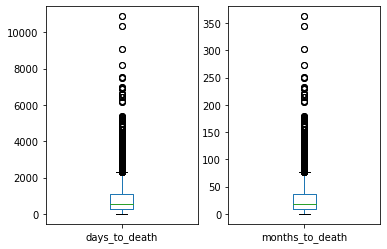

In [358]:
fix, axes = plt.subplots(1, 2)
_ = death['days_to_death'].plot(kind='box', ax=axes[0])
_ = death['months_to_death'].plot(kind='box', ax=axes[1])

In [367]:
death

,case_submitter_id,days_to_death,months_to_death
6,TCGA-MQ-A4LI,572,19.066667
7,TCGA-MQ-A4LI,572,19.066667
12,TCGA-CQ-A4CH,379,12.633333
13,TCGA-CQ-A4CH,379,12.633333
16,TCGA-B0-4696,866,28.866667
...,...,...,...
22321,TCGA-50-6591,119,3.966667
22324,TCGA-49-4506,999,33.300000
22325,TCGA-49-4506,999,33.300000
22328,TCGA-86-7711,1046,34.866667


In [365]:
censored = (~dead) & (clinical['days_to_last_follow_up'] != '-1') & (clinical['days_to_last_follow_up'] != "'--")

In [371]:
censor = clinical.loc[censored, ['case_submitter_id', 'days_to_last_follow_up']]
censor['days_to_last_follow_up'] = censor['days_to_last_follow_up'].astype(int)
censor['months_to_last_follow_up'] = censor['days_to_last_follow_up'] / 30

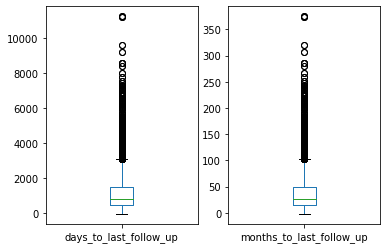

In [373]:
fix, axes = plt.subplots(1, 2)
_ = censor['days_to_last_follow_up'].plot(kind='box', ax=axes[0])
_ = censor['months_to_last_follow_up'].plot(kind='box', ax=axes[1])

### most clinical data are not usable (almost all missing, or string data)

In [214]:
clinical.columns.tolist()

['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'days_to_birth',
 'ethnicity',
 'gender',
 'race',
 'vital_status',
 'year_of_birth',
 'age_at_diagnosis',
 'days_to_diagnosis',
 'days_to_last_follow_up',
 'icd_10_code',
 'morphology',
 'primary_diagnosis',
 'prior_malignancy',
 'prior_treatment',
 'site_of_resection_or_biopsy',
 'synchronous_malignancy',
 'tissue_or_organ_of_origin',
 'year_of_diagnosis',
 'treatment_or_therapy',
 'treatment_type']

In [165]:
clinical['vital_status'].value_counts()

Alive           15020
Dead             7282
Not Reported       32
Name: vital_status, dtype: int64

In [180]:
clinical.columns[(clinical == 'not reported').mean() > 0.22]

Index(['last_known_disease_status', 'progression_or_recurrence', 'tumor_grade',
       'tumor_stage'],
      dtype='object')

In [166]:
clinical.filter(like='year')
clinical.filter(like='ajcc')

,year_of_birth,year_of_death,year_of_diagnosis
0,1937,'--,2004
1,1937,'--,2004
2,1951,'--,2012
3,1951,'--,2012
4,1948,'--,2010
...,...,...,...
22329,1941,'--,2011
22330,1946,'--,2011
22331,1946,'--,2011
22332,1958,'--,2010


,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition
0,M0,N0,Stage II,T3,5th
1,M0,N0,Stage II,T3,5th
2,MX,N0,Stage I,T1,7th
3,MX,N0,Stage I,T1,7th
4,M0,N0,Stage III,T3,7th
...,...,...,...,...,...
22329,M0,N1,Stage IIA,T2a,7th
22330,MX,N0,Stage IB,T2a,7th
22331,MX,N0,Stage IB,T2a,7th
22332,MX,N0,Stage IB,T2,7th


In [189]:
clinical.columns

Index(['case_id', 'case_submitter_id', 'project_id', 'age_at_index',
       'days_to_birth', 'days_to_death', 'ethnicity', 'gender', 'race',
       'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis',
       'ajcc_pathologic_m', 'ajcc_pathologic_n', 'ajcc_pathologic_stage',
       'ajcc_pathologic_t', 'ajcc_staging_system_edition', 'days_to_diagnosis',
       'days_to_last_follow_up', 'figo_stage', 'icd_10_code', 'igcccg_stage',
       'masaoka_stage', 'morphology', 'primary_diagnosis',
       'primary_gleason_grade', 'prior_malignancy', 'prior_treatment',
       'secondary_gleason_grade', 'site_of_resection_or_biopsy',
       'synchronous_malignancy', 'tissue_or_organ_of_origin',
       'year_of_diagnosis', 'treatment_or_therapy', 'treatment_type'],
      dtype='object')

In [172]:
clinical['primary_diagnosis'].value_counts()

Adenocarcinoma, NOS                         3230
Squamous cell carcinoma, NOS                2360
Infiltrating duct carcinoma, NOS            1874
Serous cystadenocarcinoma, NOS              1428
Papillary adenocarcinoma, NOS               1360
                                            ... 
Follicular carcinoma, minimally invasive       2
Aggressive fibromatosis                        2
Follicular adenocarcinoma, NOS                 2
Adenoid cystic carcinoma                       2
Liposarcoma, well differentiated               2
Name: primary_diagnosis, Length: 136, dtype: int64

In [173]:
clinical['primary_gleason_grade'].value_counts()

'--          21334
Pattern 4      500
Pattern 3      400
Pattern 5       98
Pattern 2        2
Name: primary_gleason_grade, dtype: int64

In [174]:
clinical['prior_malignancy'].value_counts()

no              18184
not reported     2292
yes              1858
Name: prior_malignancy, dtype: int64

In [193]:
clinical.filter(like='stage')

,ajcc_pathologic_stage,figo_stage,igcccg_stage,masaoka_stage
0,Stage II,'--,'--,'--
1,Stage II,'--,'--,'--
2,Stage I,'--,'--,'--
3,Stage I,'--,'--,'--
4,Stage III,'--,'--,'--
...,...,...,...,...
22329,Stage IIA,'--,'--,'--
22330,Stage IB,'--,'--,'--
22331,Stage IB,'--,'--,'--
22332,Stage IB,'--,'--,'--


In [195]:
clinical['figo_stage'].value_counts()

'--            19360
Stage IIIC       898
Stage IB         388
Stage IA         370
Stage IV         188
Stage IB1        156
Stage IIIB       150
Stage IIB        126
Stage IIIA       106
Stage IVB         88
Stage II          82
Stage IB2         78
Stage IC          76
Stage IIIC2       56
Stage IIIC1       52
Stage IIC         42
Stage IIA         40
Stage IVA         24
Stage I           16
Stage IIA2        14
Stage IIA1        10
Stage III         10
Stage IA1          2
Stage IA2          2
Name: figo_stage, dtype: int64